In [ ]:
from google.colab import files
files.upload()

Saving movies_metadata.csv to movies_metadata.csv


Content Based Recommendation

In [ ]:
import pandas as pd
df=pd.read_csv("movies_metadata.csv",nrows=50000)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
import numpy as np

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df=df[['id','title','overview']]

In [ ]:
df.head(2)

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...


In [ ]:
df.shape

(45466, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45466 non-null  object
 1   title     45460 non-null  object
 2   overview  44512 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44506 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        44506 non-null  object
 1   title     44506 non-null  object
 2   overview  44506 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title_vectorizer = TfidfVectorizer(min_df = 10)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(df['overview'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

In [ ]:
tfidf_title_features.shape

(44506, 13692)

In [ ]:
#getting recommendation for 
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances    
pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[0])
#returns distances between tfidf_title_features[0] and all other 
   
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

In [ ]:
pairwise_dist.dtype

dtype('float64')

In [ ]:
pairwise_dist

array([[0.        ],
       [1.3912714 ],
       [1.40443889],
       ...,
       [1.40739804],
       [1.38771658],
       [1.39878562]])

In [ ]:
best_ids=np.argsort(pairwise_dist.flatten())[0:10]

In [ ]:
best_ids

array([    0, 15282,  4227, 43927,  4519, 34391, 29709, 28117, 43250,
       43207])

In [ ]:
df_best_indices=list(df.index[best_ids])

#df_indices = list(data.index[indices])

In [ ]:
for i in df_best_indices:
  print(data['title'].loc[df_bestindices[i]]

#Collaborative Filtering Using Similarity Based (Item Item based recommendation system)

In [ ]:
import pandas as pd
df=pd.read_csv("ratings.csv")

In [ ]:
import pandas as pd
df=pd.read_csv('ratings.csv')
df=df[['userId','movieId','rating']]
df.head(5)

In [ ]:
import numpy as np
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId)))
print("Total No of movies  :", len(np.unique(df.movieId)))
print(max(df.userId.values))
print(max(df.movieId.values))

In [ ]:
from scipy import sparse
from scipy.sparse import csr_matrix

sparse_rating_matrix = sparse.csr_matrix((df.rating.values, (df.userId.values,
                                               df.movieId.values)),)

print(' shape is : (user, movie) : ',sparse_rating_matrix.shape)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
movie_movie_sim_sparse = cosine_similarity(X=sparse_rating_matrix.T, dense_output=False)
print("It's a ",movie_movie_sim_sparse.shape," dimensional matrix")


In [ ]:
#storing all movieids in array
movie_id=np.unique(movie_movie_sim_sparse.nonzero()[1])

#getting top20 similar movies for movieId 5
movie_movie_sim_sparse[5].toarray().ravel().argsort()[::-1][1:21]
#gives an array of similar movieId 

#movie recommendation using matrix factorization using surprise library

In [ ]:
#reading our dataset
import pandas as pd
df=pd.read_csv('ratings.csv')
df=df[['userId','movieId','rating']]
df.head(5)

In [ ]:
#install surprise and importing libraries
!pip install surprise

import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF

from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
#implementing baseline ( baseline model predicts rating as : u + bu + bi )

bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)



In [ ]:
#implementing SVD through surprise

algo = SVD(n_factors=100, biased=True, random_state=15, verbose=False)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

#we choose n_factor as 100
#returned me an rmse of 0.832

#if we want to predict for a particular user and movie
uid = str(1)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

#get prediction for specific user and item(predicts actual and estimated ratings)

pred = algo.predict(uid, iid, r_ui=4, verbose=True)
#returns output like user: 1          item: 302        r_ui = 4.00   est = 3.53 

In [ ]:
#implementing NMF
algo=NMF(n_factors=100,biased=True, random_state=15, verbose=False)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

#returns an rmse of 1.77 

#movie recommendation through neural colaborative filtering

In [ ]:
import pandas as pd
df=pd.read_csv("ratings.csv")

In [ ]:
df.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [ ]:
df=df[['userId','movieId','rating']]

In [ ]:
df.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


In [ ]:
df.shape

(1048575, 3)

In [ ]:
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(df, test_size=0.2, random_state=1)



In [ ]:
#Get the number of unique movie and users
size_of_userId = df.userId.nunique()
print(max(df.userId))
print(size_of_userId)


#size_of_movieId= df.movieId.nunique()

In [ ]:
size_of_userId

7120

In [ ]:
max(df.userId)

7120

In [ ]:
size_of_movieId

14026

In [ ]:
 max(df.movieId)

130642

In [ ]:

size_of_movieId = max(df.movieId)

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Embedding,Dense,Concatenate

In [ ]:
input_user = keras.Input(shape=[1])
embedding_user = layers.Embedding(size_of_userId+1,20)(input_user)
embedding_user_out=layers.Flatten()(embedding_user)


input_movie=keras.Input(shape=[1])
embedding_movie=layers.Embedding(size_of_movieId+1,20)(input_movie)
embedding_movie_out=layers.Flatten()(embedding_movie)

concat_layer=layers.Concatenate()([embedding_user_out,embedding_movie_out])

fc1=layers.Dense(128,activation='relu')(concat_layer)
fc2=layers.Dense(32,activation='relu')(fc1)
X_output=layers.Dense(1)(fc2)

model=keras.Model([input_user,input_movie],X_output)

In [ ]:
'''
# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(256, activation='relu')(conc)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(128, activation='relu')(fc2)
out = Dense(1)(fc3)

# Create model and compile it
model = Model([user_input, tourism_input], out)
model.compile('adam', 'mean_squared_error')
'''

'\n# creating book embedding path\ntourism_input = Input(shape=[1], name="Tourism-Input")\ntourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)\ntourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)\n\n# creating user embedding path\nuser_input = Input(shape=[1], name="User-Input")\nuser_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)\nuser_vec = Flatten(name="Flatten-Users")(user_embedding)\n\n# concatenate features\nconc = Concatenate()([tourism_vec, user_vec])\n\n# add fully-connected-layers\nfc1 = Dense(256, activation=\'relu\')(conc)\nfc2 = Dense(128, activation=\'relu\')(fc1)\nfc3 = Dense(128, activation=\'relu\')(fc2)\nout = Dense(1)(fc3)\n\n# Create model and compile it\nmodel = Model([user_input, tourism_input], out)\nmodel.compile(\'adam\', \'mean_squared_error\')\n'

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 20)        142420      ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 20)        2612860     ['input_4[0][0]']                
                                                                                            

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

hist = model.fit([Xtrain['userId'], Xtrain['movieId']], Xtrain.rating, 
                 batch_size=64, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.userId, Xtest.movieId], Xtest.rating)
                 )
                 
'''
history = model.fit([Xtrain.userId, Xtrain.movieId], Xtrain.rating, epochs=100, verbose=1)
'''

Epoch 1/5
13108/13108 [==============================] - 491s 37ms/step - loss: 0.8167 - val_loss: 0.7312
Epoch 2/5
13108/13108 [==============================] - 502s 38ms/step - loss: 0.7066 - val_loss: 0.7125
Epoch 3/5
13108/13108 [==============================] - 513s 39ms/step - loss: 0.6748 - val_loss: 0.7019
Epoch 4/5
13108/13108 [==============================] - 518s 40ms/step - loss: 0.6520 - val_loss: 0.6981
Epoch 5/5
13108/13108 [==============================] - 516s 39ms/step - loss: 0.6288 - val_loss: 0.6911


'\nhistory = model.fit([Xtrain.userId, Xtrain.movieId], Xtrain.rating, epochs=100, verbose=1)\n'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

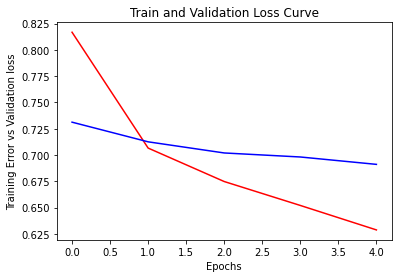

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")

plt.xlabel("Epochs")
plt.ylabel("Training Error vs Validation loss")
plt.savefig('test.png')
files.download('test.png')

In [ ]:
model.evaluate([Xtest.userId, Xtest.movieId], Xtest.rating)

6554/6554 [==============================] - 12s 2ms/step - loss: 0.6911


0.6911059617996216

In [ ]:
# Extract user embeddings
user_em = model.get_layer('embedding_2')
user_em_weights = user_em.get_weights()[0]
user_em_weights.shape

(7121, 20)

In [ ]:
# Extract user embeddings
movie_em = model.get_layer('embedding_3')
movie_em_weights = movie_em.get_weights()[0]
movie_em_weights.shape

(130643, 20)

In [ ]:
#giving ratings for userID 1
array_of_all_unique_movies=np.array(list(df['movieId'].unique()))
l=[1 for i in range(array_of_all_unique_movies.shape[0])]
user1=np.array(l)

In [ ]:
pred=model.predict([user1,array_of_all_unique_movies])

439/439 [==============================] - 1s 2ms/step


In [ ]:
pred.shape

(14026, 1)

In [ ]:
#this gives 10 indices of maximum values in descending order
idx = (-pred).argsort()[:10]

top10 = array_of_all_unique_movies[idx]
print(" top 10 movieId recommended to userId1",top10)



In [ ]:
# Extract user embeddings
user_em = model.get_layer('embedding_2')
user_em_weights = user_em.get_weights()[0]
print(user_em_weights.shape)  
#prints (7121, 20) 

# Extract user embeddings
movie_em = model.get_layer('embedding_3')
movie_em_weights = movie_em.get_weights()[0]
print(movie_em_weights.shape)
#prints  (130643, 20)